#  research topic:

# Introduction: Background information

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
total = pd.read_csv('131project.csv')
total = total.rename(columns = {'suicides/100k pop':'suicide_rate'})
total = total.rename(columns = {'gdp_per_capita ($)':'gdpc'})
total = total.rename(columns = {' gdp_for_year ($) ':'gdp'})
HDIdata = pd.read_csv('HDI.csv')
HDIdata = HDIdata.melt('Country')
HDIdata.rename(columns = {'variable':'year', 'value':'HDI'}, inplace=True)
HDIdata['year'] = HDIdata.year.astype(int)
HDIdata['Country'] = HDIdata['Country'].str[1:]
HDIdata.head()
total = total.drop(columns='HDI for year')
total = pd.merge(total, HDIdata,  how='left', left_on=['country', 'year'], right_on = ['Country', 'year'])
total = total.drop(columns='Country')
total.rename(columns = {'HDI_y':'HDI'}, inplace=True)
total.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers,NaN


In [3]:
middleeastcountry=['Cyprus','Israel','Bahrain','Oman','Qatar']

northeuropecountry=['Iceland', 'Finland','Denmark','Norway','Sweden']
middleeast=total[total.country.isin(middleeastcountry)]
northeurope=total[total.country.isin(northeuropecountry)]

middleeast.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI
2636,Bahrain,1985,male,25-34 years,7,67600,10.36,Bahrain1985,3651861702,9980,Boomers,NaN
2637,Bahrain,1985,male,35-54 years,3,49700,6.04,Bahrain1985,3651861702,9980,Silent,NaN
2638,Bahrain,1985,female,35-54 years,1,26900,3.72,Bahrain1985,3651861702,9980,Silent,NaN
2639,Bahrain,1985,female,15-24 years,0,37800,0.00,Bahrain1985,3651861702,9980,Generation X,NaN
2640,Bahrain,1985,female,25-34 years,0,27600,0.00,Bahrain1985,3651861702,9980,Boomers,NaN


In [4]:
northeurope.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI
7418,Denmark,1994,male,75+ years,89,131700,67.58,Denmark1994,156162311732,32034,G.I. Generation,0.824
7419,Denmark,1994,male,55-74 years,189,448200,42.17,Denmark1994,156162311732,32034,Silent,0.824
7420,Denmark,1994,male,35-54 years,279,755600,36.92,Denmark1994,156162311732,32034,Boomers,0.824
7421,Denmark,1994,female,75+ years,70,230600,30.36,Denmark1994,156162311732,32034,G.I. Generation,0.824
7422,Denmark,1994,male,25-34 years,85,414100,20.53,Denmark1994,156162311732,32034,Boomers,0.824


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a86e470>,
      dtype=object)

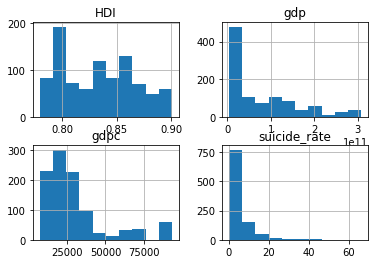

In [5]:
middleeast[['gdp','gdpc','suicide_rate','HDI']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1084d2d30>,
      dtype=object)

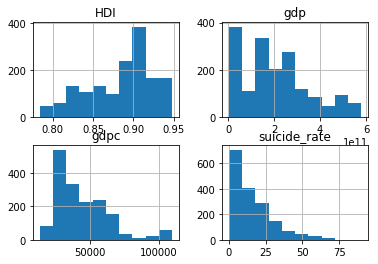

In [6]:
northeurope[['gdp','gdpc','suicide_rate','HDI']].hist()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


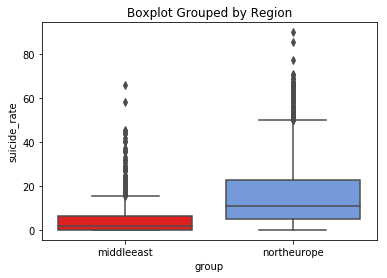

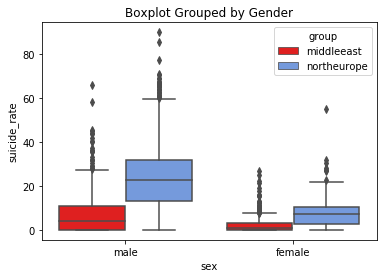

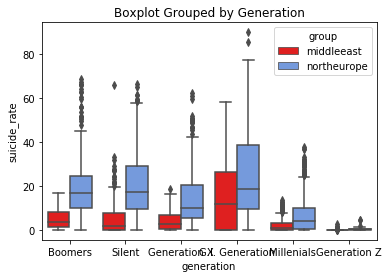

In [7]:

middleeast['group']=['middleeast']*1016
northeurope['group']=['northeurope']*1712

palette=["red", "cornflowerblue"]
both=pd.concat([middleeast, northeurope])

#two areas
box_area = sns.boxplot(data = both,
                x = 'group',
                y = 'suicide_rate',
                palette = palette)

box_area.set_title('Boxplot Grouped by Region') #
plt.show()

# by gender

box_gender = sns.boxplot(data = both,
                hue = 'group', # different colors for different 'cls'
                x = 'sex',
                y = 'suicide_rate',
                palette = palette
                        )

box_gender.set_title('Boxplot Grouped by Gender') # You can change the title here
plt.show()

# by generation
box_generation = sns.boxplot(data = both,
                hue = 'group', # different colors for different 'cls'
                x = 'generation',
                y = 'suicide_rate',
                palette = palette)

box_generation.set_title('Boxplot Grouped by Generation') #
plt.show()


## Middle east

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


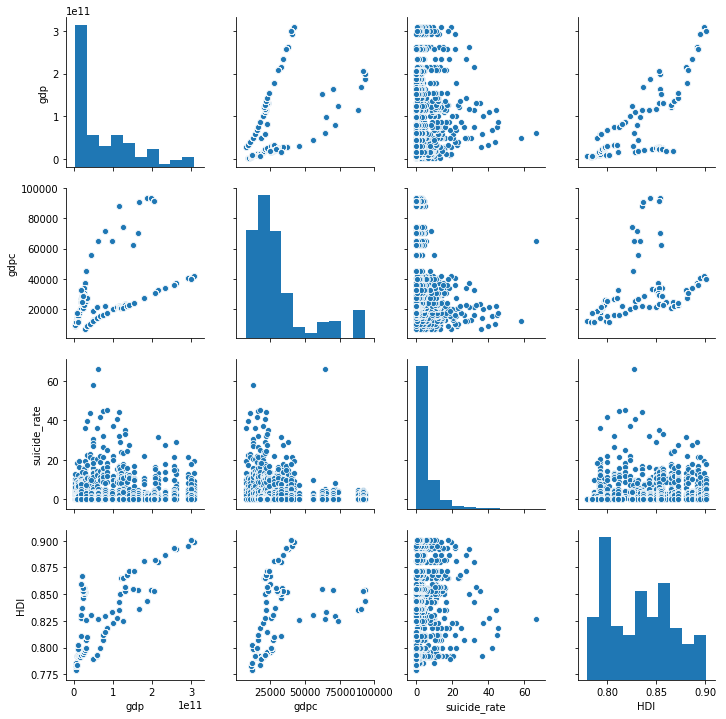

In [8]:
sns.pairplot(middleeast[['gdp','gdpc','suicide_rate','HDI']])

### gdpc and suiside rate

,gdpc,suicide_rate
gdpc,1.00000,-0.30887
suicide_rate,-0.30887,1.00000


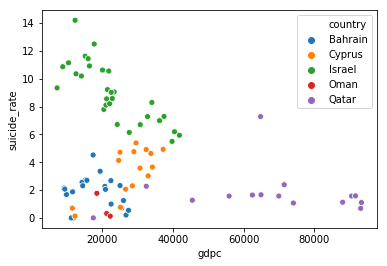

In [9]:
gdp_plot = middleeast.groupby([middleeast.country, middleeast.year]).gdpc.mean()
suicide_rate_plot = middleeast.groupby([middleeast.country, middleeast.year]).suicide_rate.mean()

joint = pd.DataFrame(gdp_plot).join(pd.DataFrame(suicide_rate_plot))

#plt.scatter(joint.gdpc, joint.suicide_rate)
joint_reset = joint.reset_index()

sns.scatterplot(joint_reset.gdpc, joint_reset.suicide_rate, hue = joint_reset.country)
joint.corr()

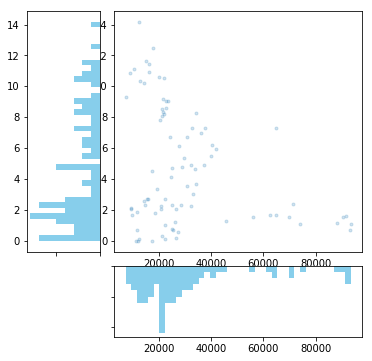

In [10]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4)   ## 4 x 4 grid
main_ax = fig.add_subplot(grid[:-1, 1:]) # vertically, we start at the beginning, and leave one space


# horizontally, we start at the second and go to the end
y_hist = fig.add_subplot(grid[:-1, 0 ], xticklabels=[], sharey=main_ax) # share y axis with main, no ticks on x
x_hist = fig.add_subplot(grid[ -1, 1:], yticklabels=[], sharex=main_ax) # share x axis with main, no ticks on y

# scatter points on the main axes
main_ax.plot(joint_reset.gdpc, joint_reset.suicide_rate, 'o', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(joint_reset.gdpc, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
x_hist.invert_yaxis()

y_hist.hist(joint_reset.suicide_rate, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()


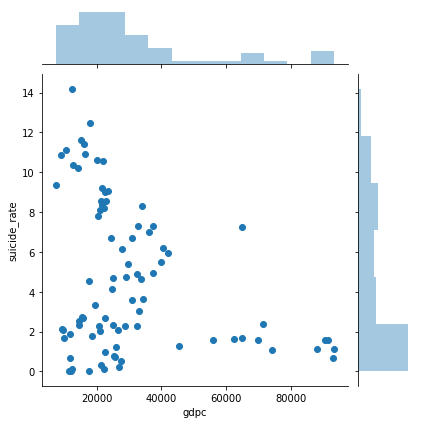

In [22]:
sns.jointplot(x='gdpc', y='suicide_rate', data = joint_reset)

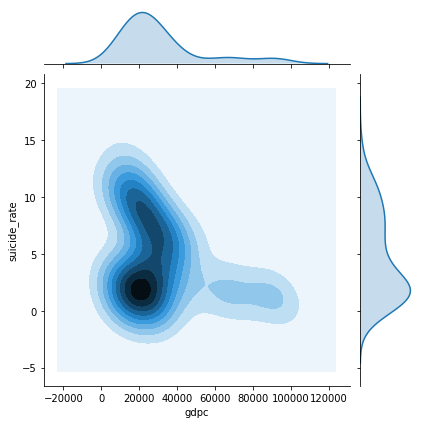

In [20]:
sns.jointplot(x="gdpc", y="suicide_rate", data=joint_reset, kind="kde")

### HDI vs suiside rate

## Northen europe

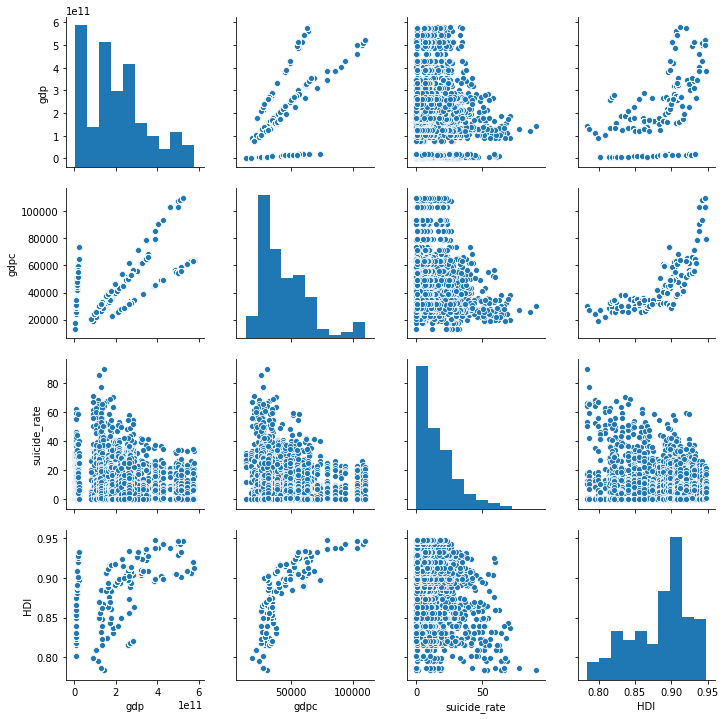

In [12]:
sns.pairplot(northeurope[['gdp','gdpc','suicide_rate','HDI']])

### gdpc vs suiside rate

,gdpc,suicide_rate
gdpc,1.000000,-0.493508
suicide_rate,-0.493508,1.000000


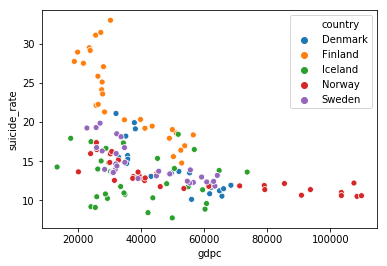

In [13]:
gdp_plot2 = northeurope.groupby([northeurope.country, northeurope.year]).gdpc.mean()
suicide_rate_plot2 = northeurope.groupby([northeurope.country, northeurope.year]).suicide_rate.mean()

joint2 = pd.DataFrame(gdp_plot2).join(pd.DataFrame(suicide_rate_plot2))

#plt.scatter(joint.gdpc, joint.suicide_rate)
joint_reset2 = joint2.reset_index()

sns.scatterplot(joint_reset2.gdpc, joint_reset2.suicide_rate, hue = joint_reset2.country)
joint2.corr()

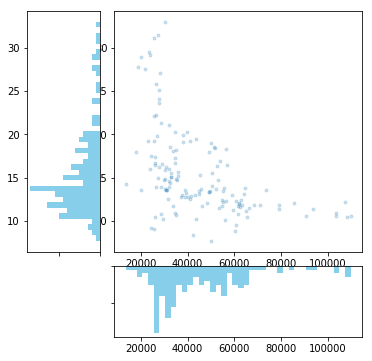

In [14]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4)   ## 4 x 4 grid
main_ax = fig.add_subplot(grid[:-1, 1:]) # vertically, we start at the beginning, and leave one space


# horizontally, we start at the second and go to the end
y_hist = fig.add_subplot(grid[:-1, 0 ], xticklabels=[], sharey=main_ax) # share y axis with main, no ticks on x
x_hist = fig.add_subplot(grid[ -1, 1:], yticklabels=[], sharex=main_ax) # share x axis with main, no ticks on y

# scatter points on the main axes
main_ax.plot(joint_reset2.gdpc, joint_reset2.suicide_rate, 'o', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(joint_reset2.gdpc, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
x_hist.invert_yaxis()

y_hist.hist(joint_reset2.suicide_rate, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()


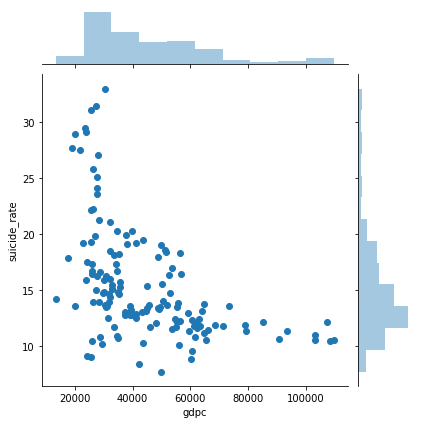

In [15]:
sns.jointplot(x='gdpc', y='suicide_rate', data = joint_reset2)

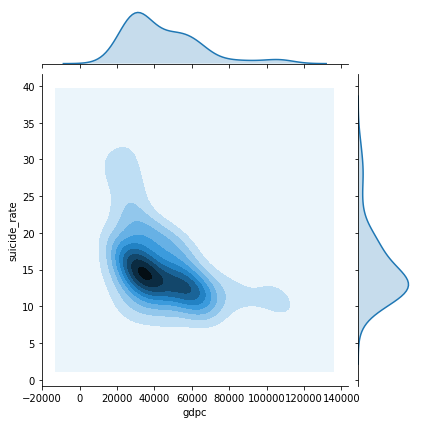

In [16]:
sns.jointplot(x="gdpc", y="suicide_rate", data=joint_reset2, kind="kde")

### HDI vs suiside rate

# Data modeling